# Predicting the Final Grade of Students

Through exploratory data analysis (EDA) and predictive modeling, this dataset provides a unique opportunity to uncover patterns, correlations, and predictors of student success. By leveraging machine learning techniques, we aim to not only understand the factors influencing academic achievement but also to devise strategies for intervention and support.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#read dataset
df=pd.read_csv("C:/Anaconda/student-por.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [5]:
#to show the null value count for each column and the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
#to check the number of null values in each column
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [7]:
#to give a descriptive summary of the dataset
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


## Exploratory Data Analysis

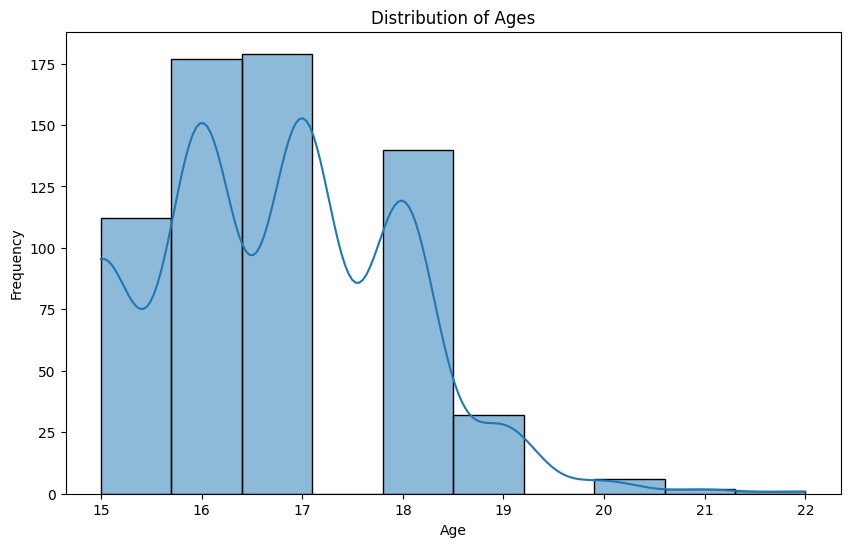

In [8]:
# Visualize the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

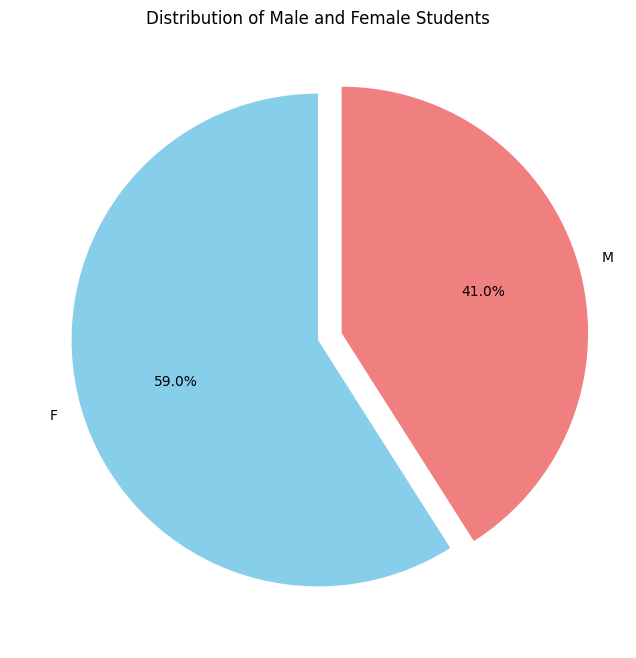

In [9]:
# Pie chart for the distribution of male and female students
plt.figure(figsize=(8, 8))
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], explode=(0, 0.1), startangle=90)
plt.title('Distribution of Male and Female Students')
plt.ylabel('')
plt.show()

In [10]:
# Define the threshold for high grades (e.g., top 25th percentile)
threshold_grade = np.percentile(df['G3'], 75)

# Filter the DataFrame to select "A-rated" students
a_rated_students = df[df['G3'] >= threshold_grade]

# Display information about "A-rated" students
print("Number of A-rated students:", len(a_rated_students))
print("Threshold grade for A-rating:", threshold_grade)
print("Mean final grade for A-rated students:", a_rated_students['G3'].mean())

Number of A-rated students: 194
Threshold grade for A-rating: 14.0
Mean final grade for A-rated students: 15.43298969072165


C:\Users\Prithvi's Laptop\AppData\Local\Temp\ipykernel_20784\1968501418.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=a_rated_students, x='sex', palette='Set2')


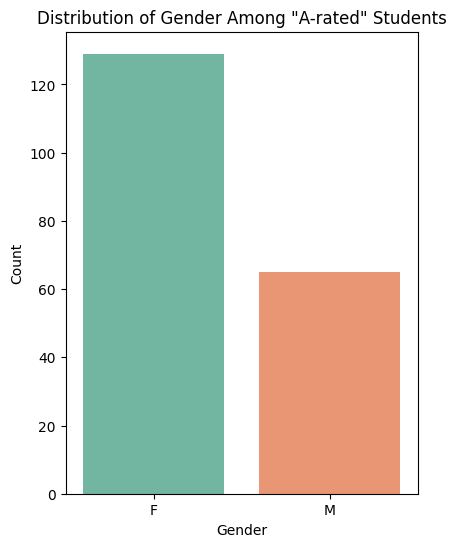

C:\Users\Prithvi's Laptop\AppData\Local\Temp\ipykernel_20784\1968501418.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sex', palette='Set2')


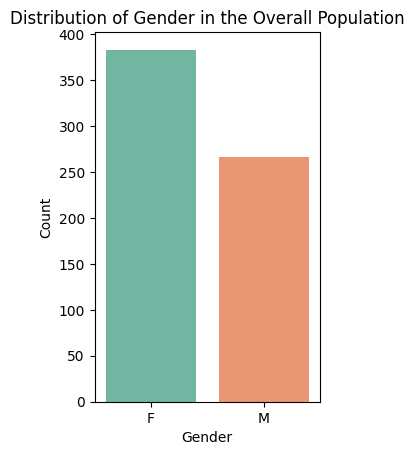

In [11]:
# Distribution of gender among "A-rated" students
plt.figure(figsize=(10, 6))

plt.subplot(1,2,1)
sns.countplot(data=a_rated_students, x='sex', palette='Set2')
plt.title('Distribution of Gender Among "A-rated" Students')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Distribution of gender in the overall population
plt.subplot(1,2,2)
sns.countplot(data=df, x='sex', palette='Set2')
plt.title('Distribution of Gender in the Overall Population')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

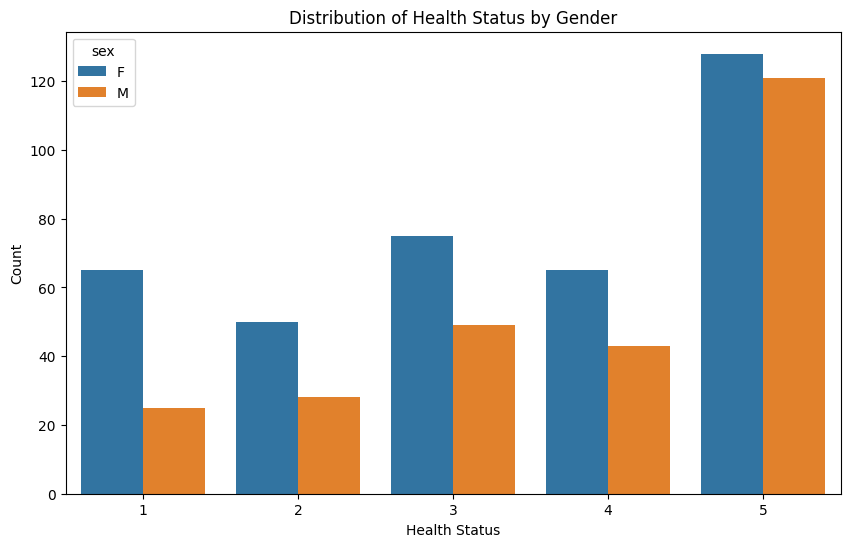

In [12]:
# Visualize the distribution of health status
plt.figure(figsize=(10, 6))
sns.countplot(x='health', hue='sex', data=df)
plt.title('Distribution of Health Status by Gender')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.show()

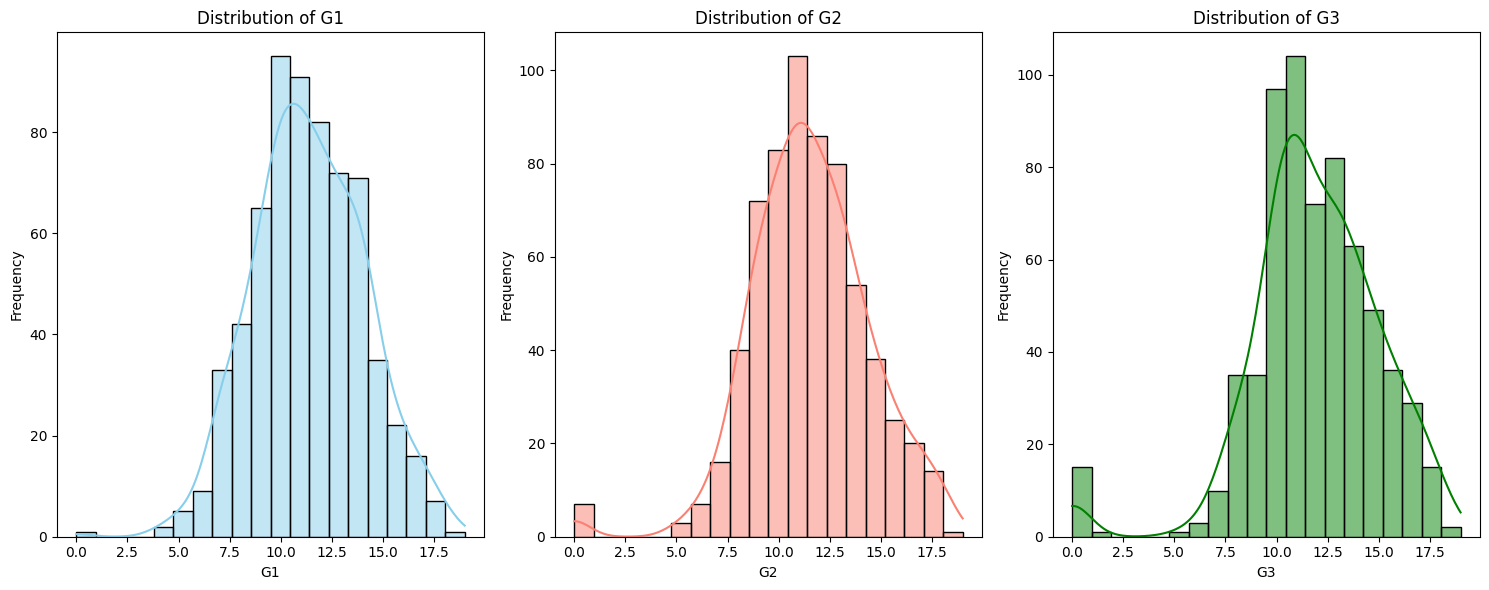

In [13]:
# Visualize the distribution of G1, G2, and G3 using subplots
plt.figure(figsize=(15, 6))

# Subplot for G1
plt.subplot(1, 3, 1)
sns.histplot(df['G1'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of G1')
plt.xlabel('G1')
plt.ylabel('Frequency')

# Subplot for G2
plt.subplot(1, 3, 2)
sns.histplot(df['G2'], bins=20, kde=True, color='salmon')
plt.title('Distribution of G2')
plt.xlabel('G2')
plt.ylabel('Frequency')

# Subplot for G3
plt.subplot(1, 3, 3)
sns.histplot(df['G3'], bins=20, kde=True, color='green')
plt.title('Distribution of G3')
plt.xlabel('G3')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

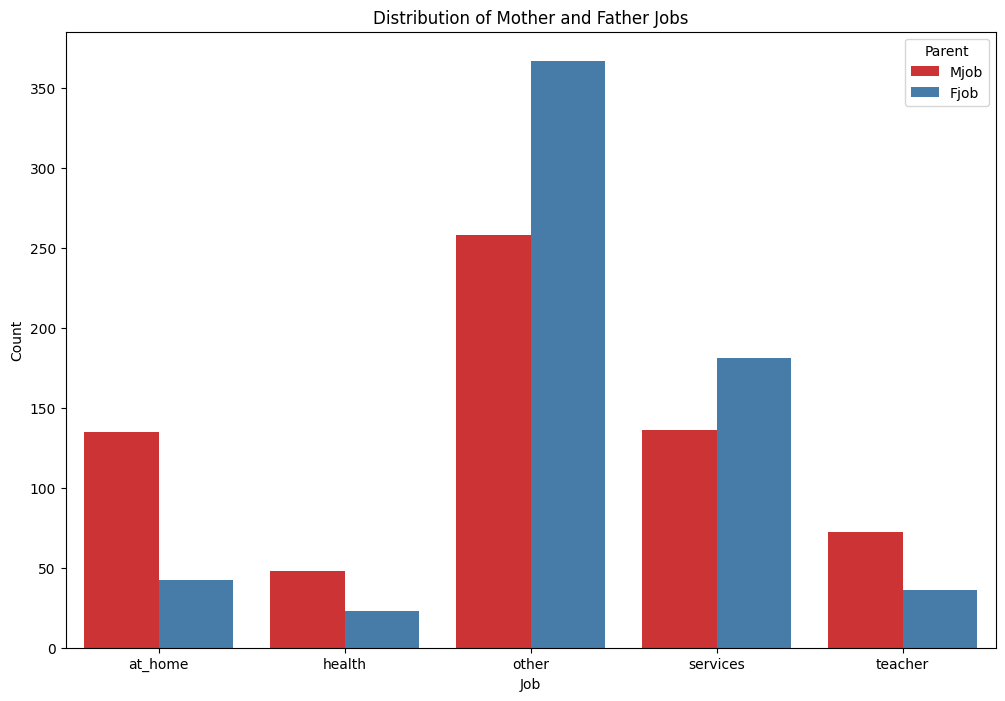

In [14]:
# Create a DataFrame for the Mjobs and Fjobs columns
jobs_df = df[['Mjob', 'Fjob']]

# Melt the DataFrame to have a single 'Job' column
melted_jobs_df = jobs_df.melt(value_vars=['Mjob', 'Fjob'], var_name='Parent', value_name='Job')

# Create a count plot
plt.figure(figsize=(12, 8))
sns.countplot(x='Job', hue='Parent', data=melted_jobs_df, palette='Set1')
plt.title('Distribution of Mother and Father Jobs')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

C:\Users\Prithvi's Laptop\AppData\Local\Temp\ipykernel_20784\573775658.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Dalc', y='G3', data=df, ci=None, palette='Set3')
C:\Users\Prithvi's Laptop\AppData\Local\Temp\ipykernel_20784\573775658.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dalc', y='G3', data=df, ci=None, palette='Set3')
C:\Users\Prithvi's Laptop\AppData\Local\Temp\ipykernel_20784\573775658.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Walc', y='G3', data=df, ci=None, palette='Set3')
C:\Users\Prithvi's Laptop\AppData\Local\Temp\ipykernel_20784\573775658.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` var

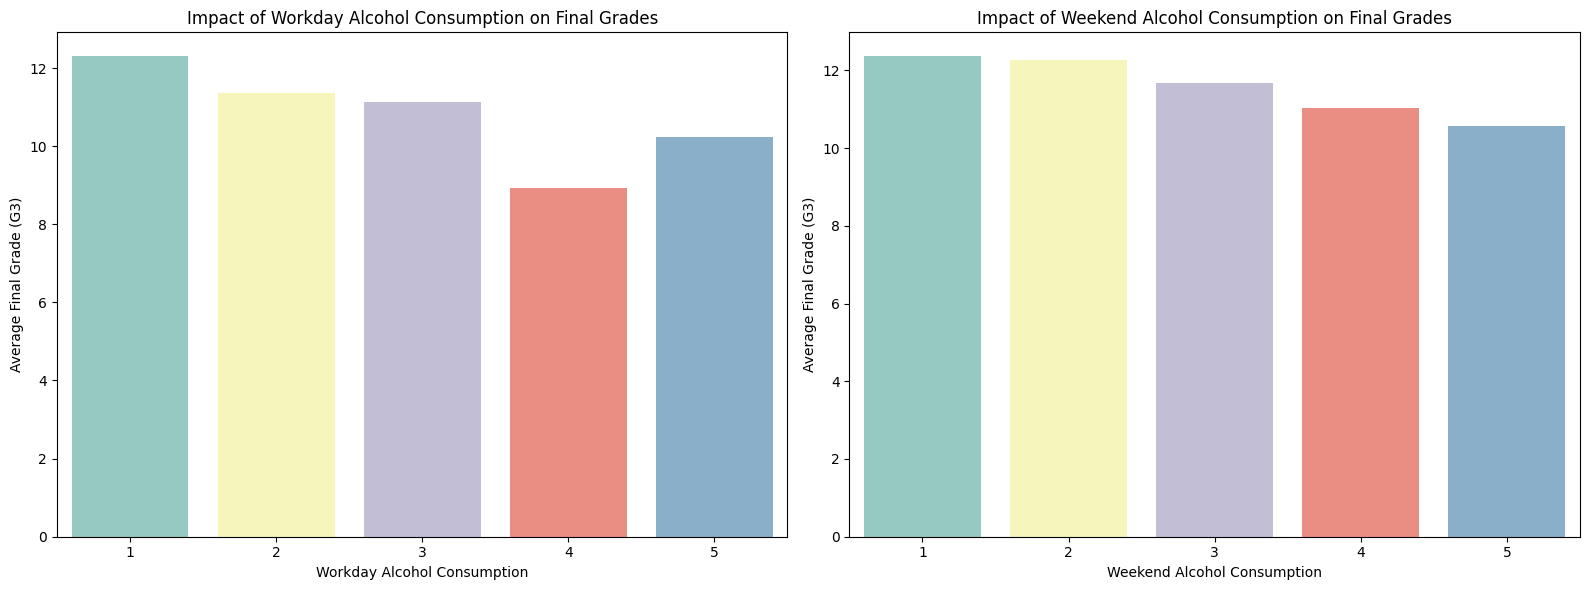

In [15]:
# Bar plots for Workday and Weekend Alcohol Consumption using subplots
plt.figure(figsize=(16, 6))

# Subplot for Workday Alcohol Consumption
plt.subplot(1, 2, 1)
sns.barplot(x='Dalc', y='G3', data=df, ci=None, palette='Set3')
plt.title('Impact of Workday Alcohol Consumption on Final Grades')
plt.xlabel('Workday Alcohol Consumption')
plt.ylabel('Average Final Grade (G3)')

# Subplot for Weekend Alcohol Consumption
plt.subplot(1, 2, 2)
sns.barplot(x='Walc', y='G3', data=df, ci=None, palette='Set3')
plt.title('Impact of Weekend Alcohol Consumption on Final Grades')
plt.xlabel('Weekend Alcohol Consumption')
plt.ylabel('Average Final Grade (G3)')

plt.tight_layout()
plt.show()

C:\Users\Prithvi's Laptop\AppData\Local\Temp\ipykernel_20784\2810283197.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medu', y='G3', data=df, palette='Set2')
C:\Users\Prithvi's Laptop\AppData\Local\Temp\ipykernel_20784\2810283197.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fedu', y='G3', data=df, palette='Set2')
C:\Users\Prithvi's Laptop\AppData\Local\Temp\ipykernel_20784\2810283197.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pstatus', y='G3', data=df, palette='Set2')
C:\Users\Prithvi's Laptop\AppData\Local\T

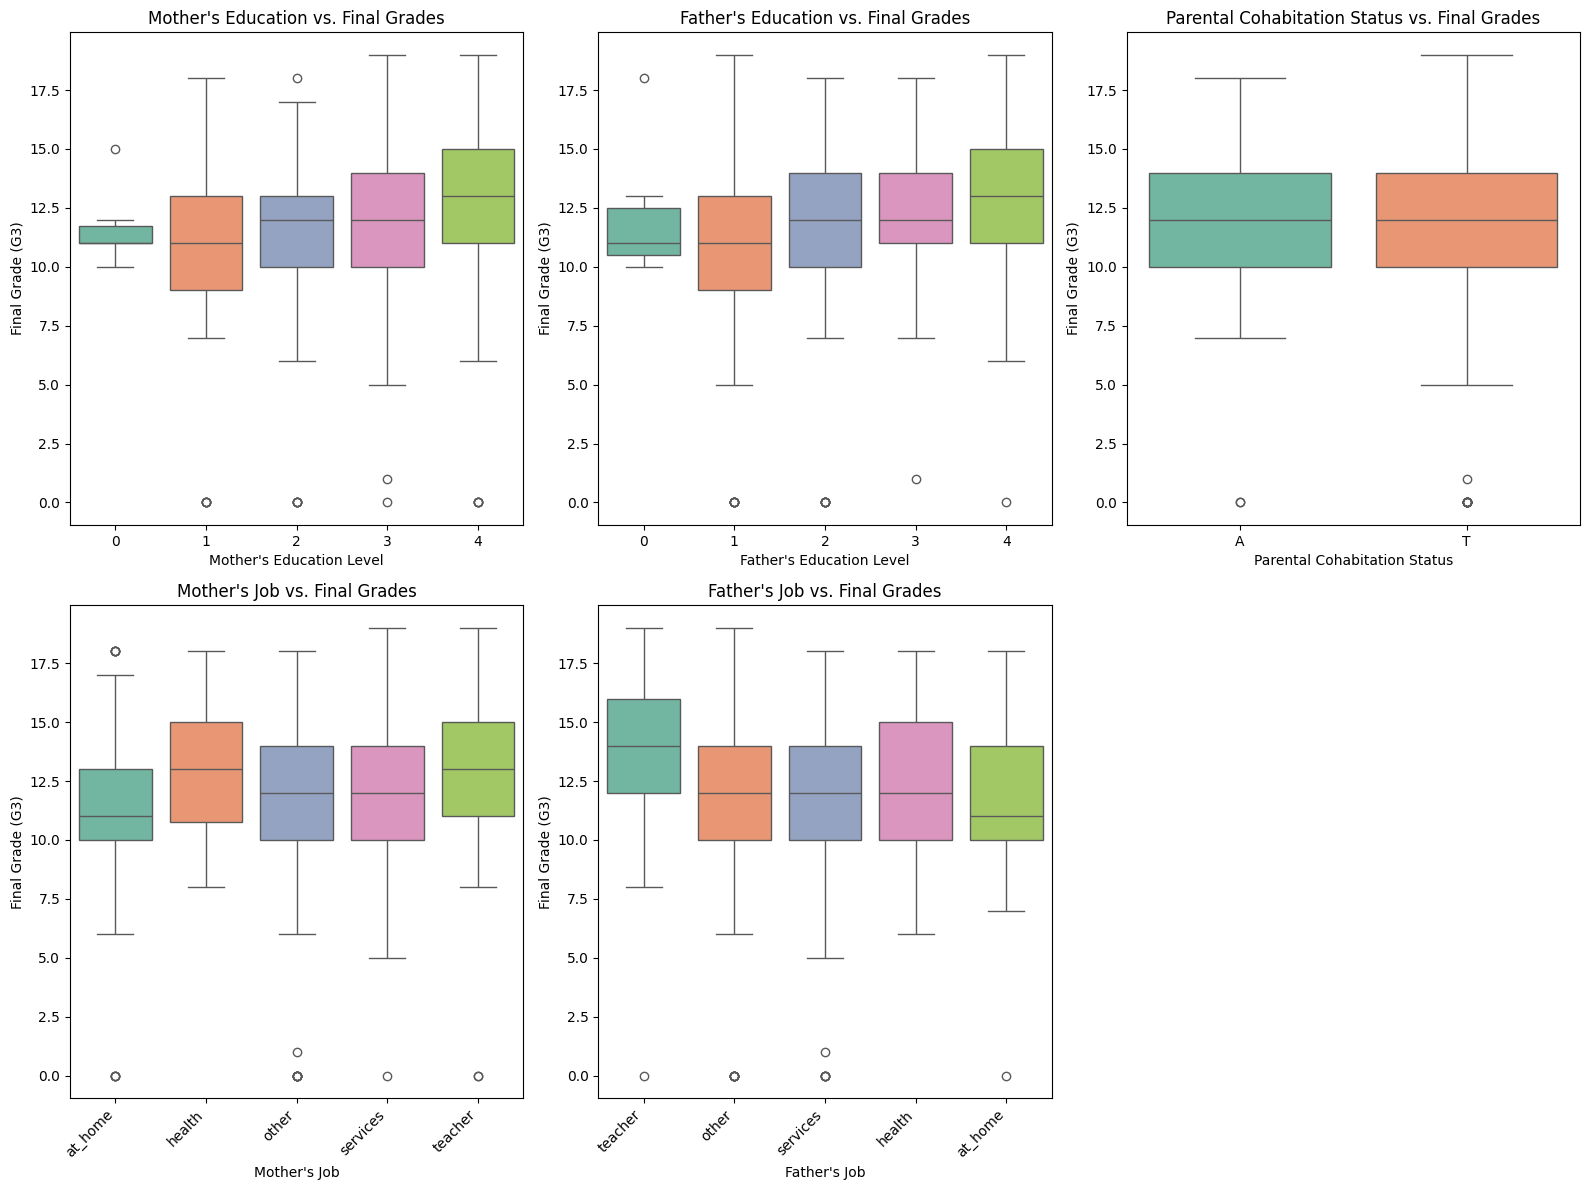

In [16]:
# Grouped EDA of parental factors on final grades (G3)
plt.figure(figsize=(16, 12))

# Subplot for Mother's and Father's Education
plt.subplot(2, 3, 1)
sns.boxplot(x='Medu', y='G3', data=df, palette='Set2')
plt.title("Mother's Education vs. Final Grades")
plt.xlabel("Mother's Education Level")
plt.ylabel('Final Grade (G3)')

plt.subplot(2, 3, 2)
sns.boxplot(x='Fedu', y='G3', data=df, palette='Set2')
plt.title("Father's Education vs. Final Grades")
plt.xlabel("Father's Education Level")
plt.ylabel('Final Grade (G3)')

# Subplot for Parental Cohabitation Status
plt.subplot(2, 3, 3)
sns.boxplot(x='Pstatus', y='G3', data=df, palette='Set2')
plt.title('Parental Cohabitation Status vs. Final Grades')
plt.xlabel('Parental Cohabitation Status')
plt.ylabel('Final Grade (G3)')

# Subplot for Mother's Job
plt.subplot(2, 3, 4)
sns.boxplot(x='Mjob', y='G3', data=df, palette='Set2')
plt.title("Mother's Job vs. Final Grades")
plt.xlabel("Mother's Job")
plt.ylabel('Final Grade (G3)')
plt.xticks(rotation=45, ha='right')

# Subplot for Father's Job
plt.subplot(2, 3, 5)
sns.boxplot(x='Fjob', y='G3', data=df, palette='Set2')
plt.title("Father's Job vs. Final Grades")
plt.xlabel("Father's Job")
plt.ylabel('Final Grade (G3)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

C:\Users\Prithvi's Laptop\AppData\Local\Temp\ipykernel_20784\1640195786.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='school', y='G3', data=df, palette='Set1')
C:\Users\Prithvi's Laptop\AppData\Local\Temp\ipykernel_20784\1640195786.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='reason', y='G3', data=df, palette='Set1')
C:\Users\Prithvi's Laptop\AppData\Local\Temp\ipykernel_20784\1640195786.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='traveltime', y='G3', data=df, palette='Set1')
C:\Users\Prithvi's Laptop\AppData\

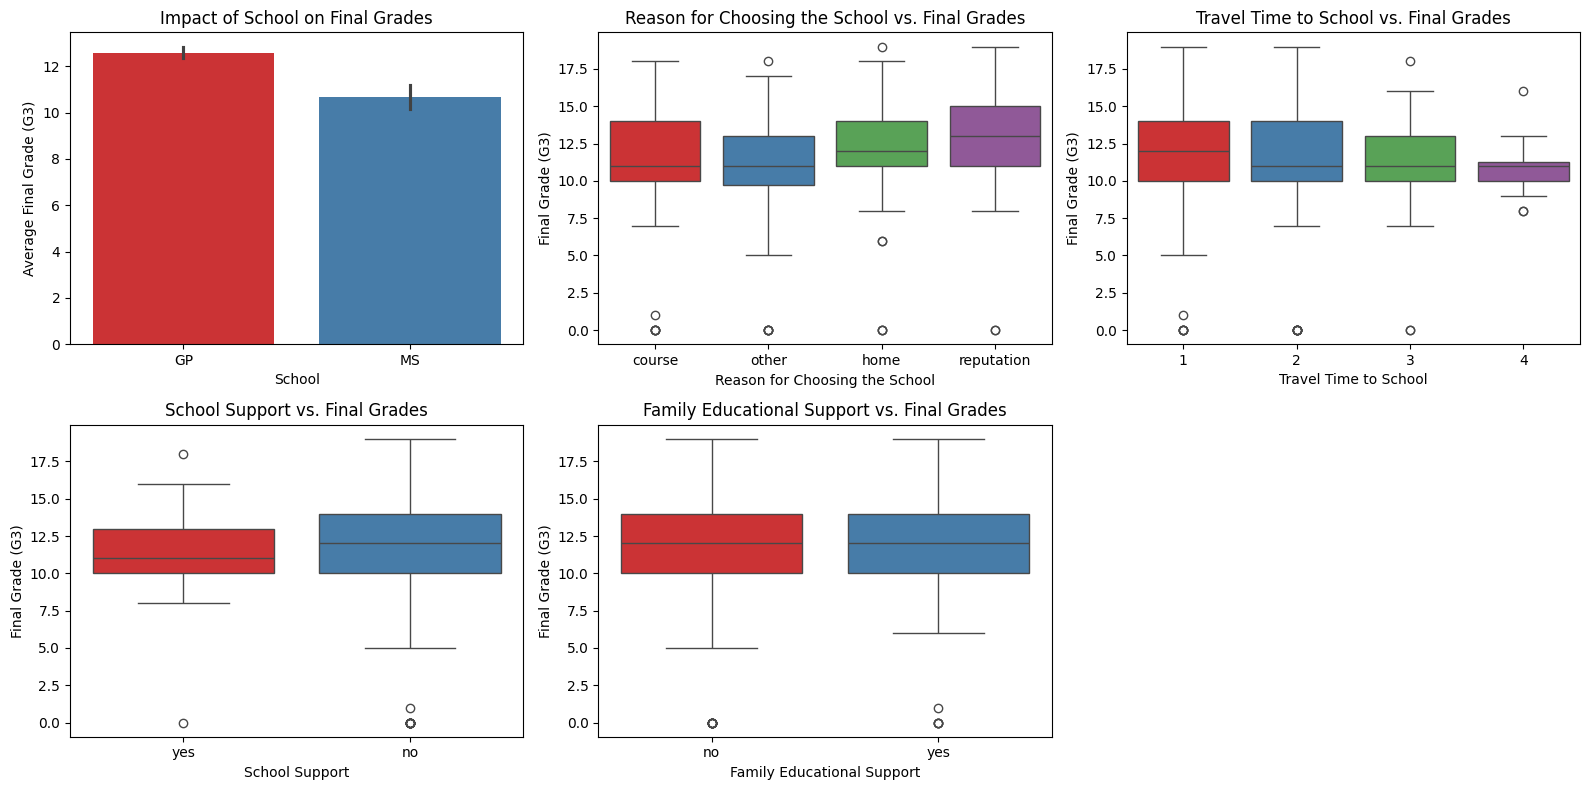

In [17]:
# Grouped EDA of school-related factors on final grades (G3)
plt.figure(figsize=(16, 8))

# Subplot for School
plt.subplot(2, 3, 1)
sns.barplot(x='school', y='G3', data=df, palette='Set1')
plt.title('Impact of School on Final Grades')
plt.xlabel('School')
plt.ylabel('Average Final Grade (G3)')

# Subplot for Reason for Choosing the School
plt.subplot(2, 3, 2)
sns.boxplot(x='reason', y='G3', data=df, palette='Set1')
plt.title('Reason for Choosing the School vs. Final Grades')
plt.xlabel('Reason for Choosing the School')
plt.ylabel('Final Grade (G3)')

# Subplot for Travel Time to School
plt.subplot(2, 3, 3)
sns.boxplot(x='traveltime', y='G3', data=df, palette='Set1')
plt.title('Travel Time to School vs. Final Grades')
plt.xlabel('Travel Time to School')
plt.ylabel('Final Grade (G3)')

# Subplot for School Support
plt.subplot(2, 3, 4)
sns.boxplot(x='schoolsup', y='G3', data=df, palette='Set1')
plt.title('School Support vs. Final Grades')
plt.xlabel('School Support')
plt.ylabel('Final Grade (G3)')

# Subplot for Extra Educational Support
plt.subplot(2, 3, 5)
sns.boxplot(x='famsup', y='G3', data=df, palette='Set1')
plt.title('Family Educational Support vs. Final Grades')
plt.xlabel('Family Educational Support')
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()


C:\Users\Prithvi's Laptop\AppData\Local\Temp\ipykernel_1760\3460708721.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='studytime', y='G3', data=df, ci=None, palette='Set2')
C:\Users\Prithvi's Laptop\AppData\Local\Temp\ipykernel_1760\3460708721.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='studytime', y='G3', data=df, ci=None, palette='Set2')
C:\Users\Prithvi's Laptop\AppData\Local\Temp\ipykernel_1760\3460708721.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='activities', y='G3', data=df, palette='Set2')


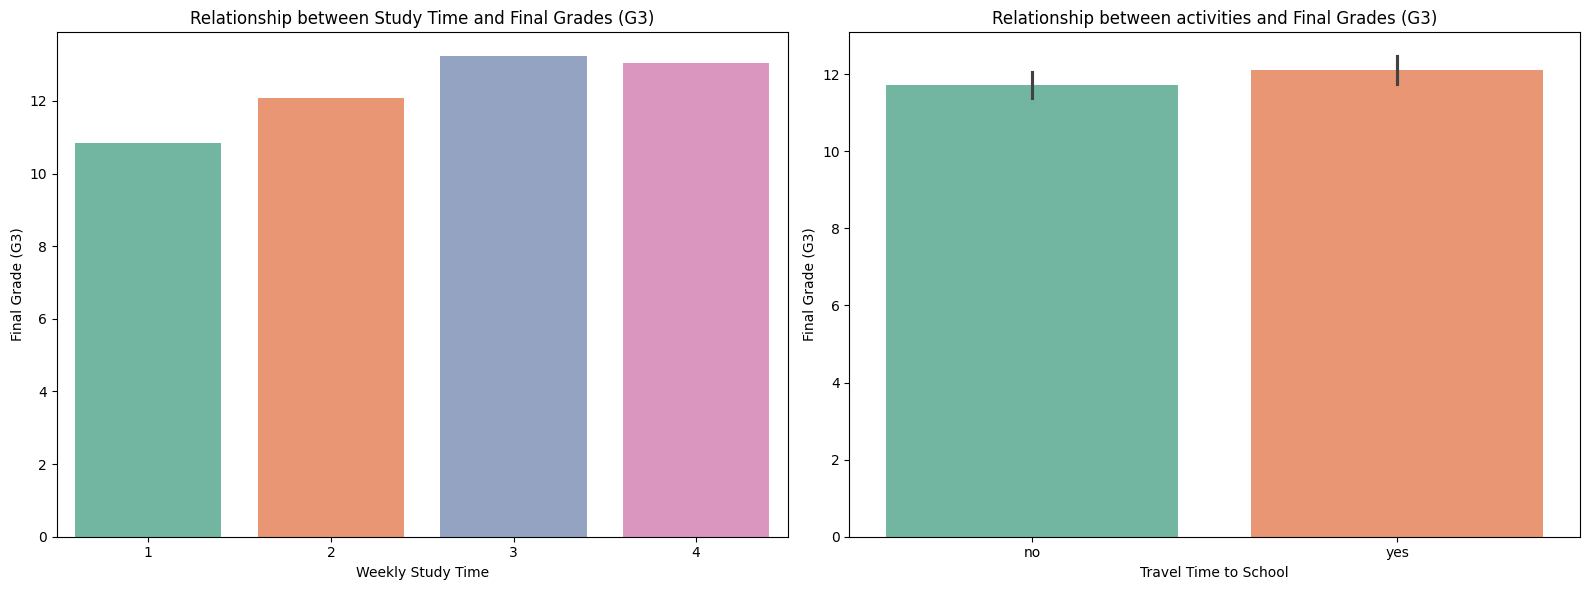

In [17]:
# Explore the relationship between study time and final grades
plt.figure(figsize=(16, 6))

#Explore the relationship between study time and final grades
plt.subplot(1, 2, 1)
sns.barplot(x='studytime', y='G3', data=df, ci=None, palette='Set2')
plt.title('Relationship between Study Time and Final Grades (G3)')
plt.xlabel('Weekly Study Time')
plt.ylabel('Final Grade (G3)')

# Explore the relationship between travel time and final grades
plt.subplot(1, 2, 2)
sns.barplot(x='activities', y='G3', data=df, palette='Set2')
plt.title('Relationship between activities and Final Grades (G3)')
plt.xlabel('Travel Time to School')
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()

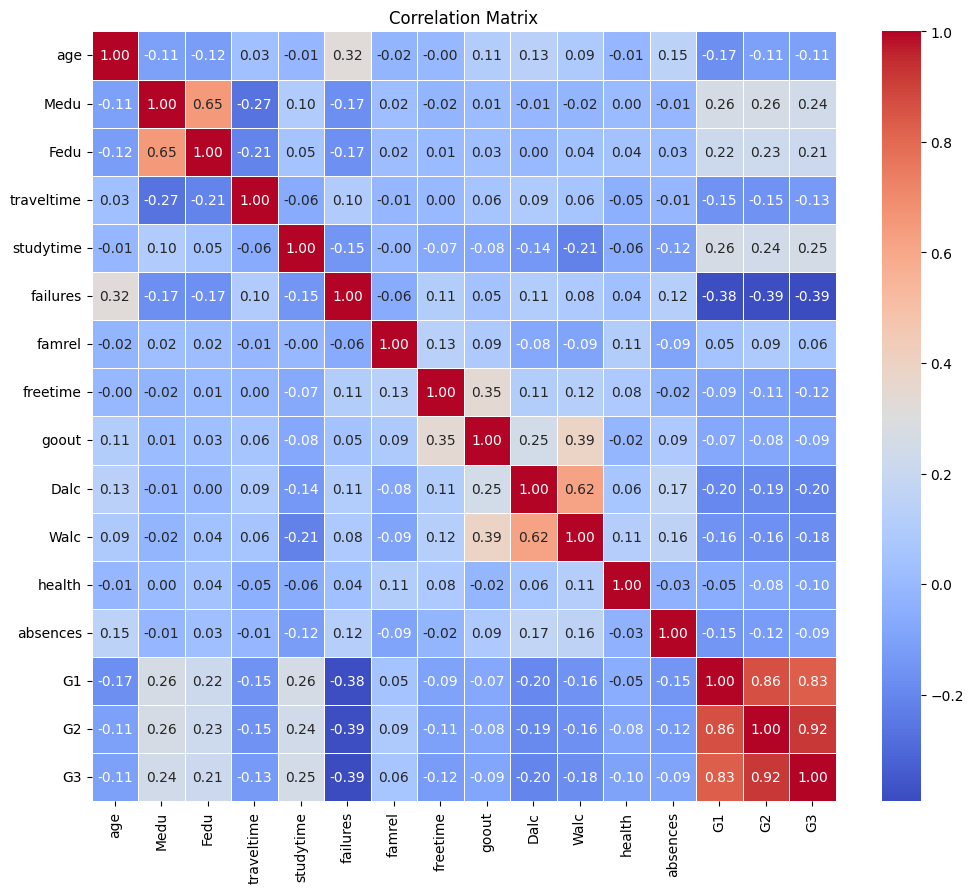

In [18]:
# Select only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Visualize the correlation matrix for numeric columns
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


### Visualisation Insights

Grades (G1, G2, G3): There’s a strong positive correlation between G1, G2, and G3. This suggests that students who perform well in one grading period are likely to perform well in others. The darker red color in these cells indicates a high positive correlation.

## Machine Learning

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# dataset
x=scaler.fit_transform(pd.get_dummies(df.drop(['G3'], axis=1)))  #features
y=df['G3'].values     #labels

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

# Create a linear regression model
linear_model = LinearRegression()
# Fit the model on the training data
linear_model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = linear_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 1.20
R-squared (R2): 0.88


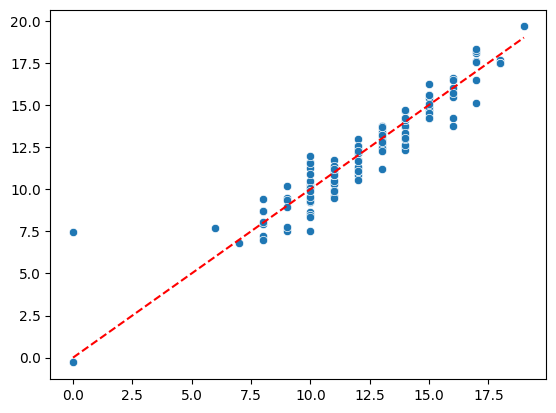

In [21]:
#visualize it
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--", color='red')

In [22]:
from sklearn.linear_model import Lasso

#create lasso model
lasso_model= Lasso(alpha=0.1)

#fit the model with the training model
lasso_model.fit(x_train, y_train)

#make prediction
y_pred=lasso_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 1.13
R-squared (R2): 0.88


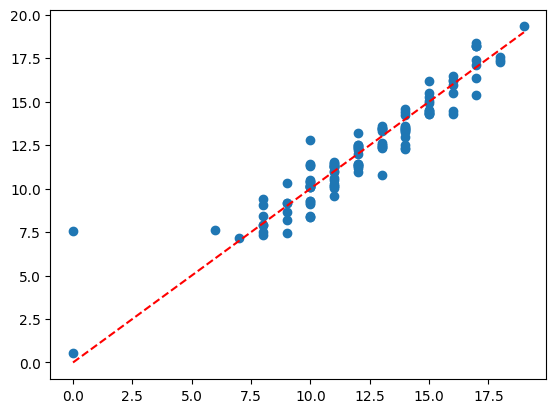

In [23]:
#visualize it
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], c='r',
         linestyle='--')

In [24]:
from sklearn.svm import SVR

# Create an SVR model
SVR_model = SVR(kernel='linear', C=1.0)

# Fit the model on the training data
SVR_model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = SVR_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 1.24
R-squared (R2): 0.87


In [25]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

KNN_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = KNN_classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

In [26]:
print(ac)
print(classification_report(y_test, y_pred))
print(cm)

0.2153846153846154
              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.20      0.14      0.17         7
           9       0.17      0.17      0.17         6
          10       0.28      0.33      0.30        21
          11       0.14      0.24      0.18        17
          12       0.29      0.31      0.30        16
          13       0.19      0.31      0.24        13
          14       0.20      0.07      0.10        15
          15       0.30      0.25      0.27        12
          16       0.00      0.00      0.00         7
          17       0.33      0.12      0.18         8
          18       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         1

    accuracy                           0.22       130
   macro avg       0.16      0.16      0.15       130
weighte

C:\Users\Prithvi's Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prithvi's Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prithvi's Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

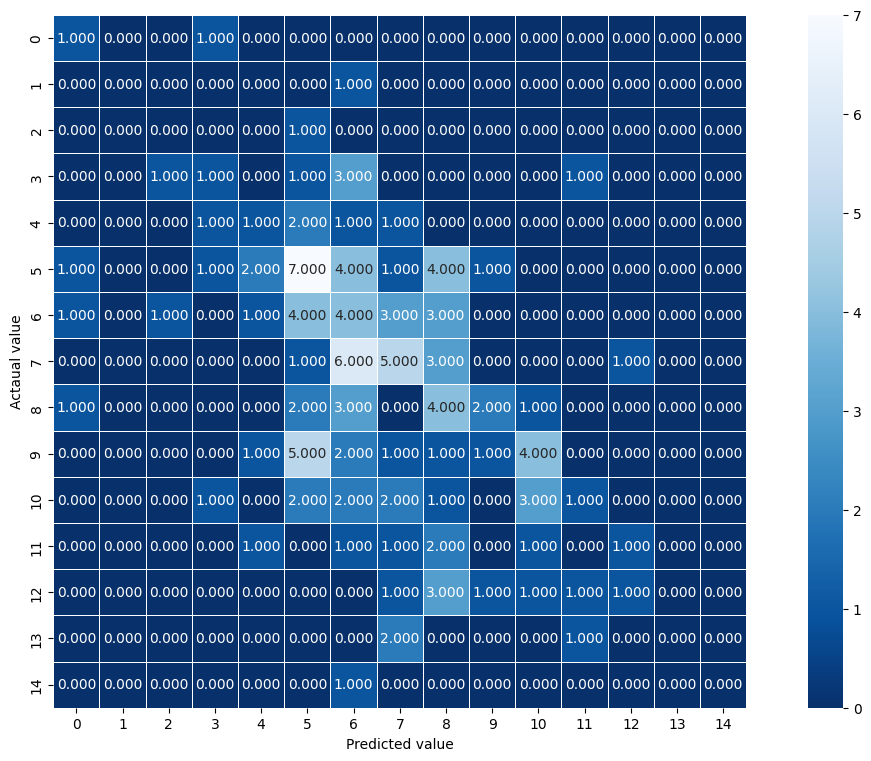

In [27]:
plt.figure(figsize=(16,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r")
plt.ylabel("Actaual value")
plt.xlabel("Predicted value")
all_sample_title='Accuracy Score: {}'.format(ac)

In [28]:
from sklearn import svm

# Create an SVM model (SVC)
SVM_model = svm.SVC(kernel= "linear", C= 5.0, random_state=23)


# Fit the model on the training data
SVM_model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = SVM_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report_result)

Accuracy: 0.27

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.18      0.29      0.22         7
           9       0.00      0.00      0.00         6
          10       0.38      0.29      0.32        21
          11       0.26      0.35      0.30        17
          12       0.31      0.31      0.31        16
          13       0.33      0.46      0.39        13
          14       0.33      0.13      0.19        15
          15       0.44      0.33      0.38        12
          16       0.17      0.29      0.21         7
          17       0.00      0.00      0.00         8
          18       0.33      0.33      0.33         3
          19       0.00      0.00      0.00         1

    accuracy                           0.27       130
   macro avg       0.22      0.22      0.

C:\Users\Prithvi's Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prithvi's Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prithvi's Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

## Conclusion

The analysis of the student grade prediction dataset, along with various visualization techniques and machine learning models, has provided important insights into what affects academic performance and student behavior. 

#### Machine Learning Model Preformance

Linear regression, Lasso regression, and support vector regression (SVR) models exhibit relatively high performance, as evidenced by low mean squared error (MSE) and high R-squared (R2) scores. Classification models such as K-nearest neighbors (KNN) and support vector machine (SVM) achieved moderate accuracies in predicting final grade categories.

Overall, these findings provide valuable insights into the complex interplay between various socio-demographic, behavioral, and academic factors influencing students' academic outcomes. This knowledge can inform educational interventions and policies aimed at improving student success and well-being.